In [14]:
from sklearn import svm,datasets
from pandas.io.parsers import read_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from scipy import stats
from nested_dict import nested_dict
from pyfasta import Fasta

In [15]:
def read_icshape_out(out=None, pureID=1):
	out_dict = nested_dict()
	with open(out, 'r') as OUT:
		for line in OUT:
			line = line.strip()
			if not line or line.startswith('#'): continue
			arr = line.split('\t')
			tx_id = arr[0]
			if pureID:
				tx_id = tx_id.split('.')[0]
			length = int(arr[1])
			rpkm = float(arr[2])
			reactivity_ls = arr[3:]
			out_dict[tx_id]['tx_id'] = tx_id
			out_dict[tx_id]['length'] = length
			out_dict[tx_id]['rpkm'] = rpkm
			out_dict[tx_id]['reactivity_ls'] = reactivity_ls
	return out_dict

In [16]:
out_dict1 = read_icshape_out('kethoxalseq_rRNA_noTreat.out')
# out_dict1['18S']

out_dict2 = read_icshape_out('icSHAPE.1.rrna.out')
# out_dict2['18S']

In [17]:
fa_dict1 = Fasta('ribosomalRNA.fasta', key_fn=lambda key:key.split("\t")[0])
fa_dict = {i.split()[0].split('.')[0]:j[0:] for i,j in fa_dict1.items()}

fa_dict.keys()
print len(fa_dict['18S']), fa_dict['18S']

fa_dict2 = Fasta('human_18S.fa', key_fn=lambda key:key.split("\t")[0])
fa_dict2.keys()
print len(fa_dict2['18S'][0:]), fa_dict2['18S'][0:]

1870 ACCTGGTTGATCCTGCCAGGTAGCATATGCTTGTCTCAAAGATTAAGCCATGCATGTCTAAGTACGCACGGCCGGTACAGTGAAACTGCGAATGGCTCATTAAATCAGTTATGGTTCCTTTGGTCGCTCGCTCCTCTCCTACTTGGATAACTGTGGTAATTCTAGAGCTAATACATGCCGACGGGCGCTGACCCCCCTTCCCGGGGGGGGATGCGTGCATTTATCAGATCAAAACCAACCCGGTGAGCTCCCTCCCGGCTCCGGCCGGGGGTCGGGCGCCGGCGGCTTGGTGACTCTAGATAACCTCGGGCCGATCGCACGCCCCCCGTGGCGGCGACGACCCATTCGAACGTCTGCCCTATCAACTTTCGATGGTAGTCGCCGTGCCTACCATGGTGACCACGGGTGACGGGGAATCAGGGTTCGATTCCGGAGAGGGAGCCTGAGAAACGGCTACCACATCCAAGGAAGGCAGCAGGCGCGCAAATTACCCACTCCCGACCCGGGGAGGTAGTGACGAAAAATAACAATACAGGACTCTTTCGAGGCCCTGTAATTGGAATGAGTCCACTTTAAATCCTTTAACGAGGATCCATTGGAGGGCAAGTCTGGTGCCAGCAGCCGCGGTAATTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGTTGGATCTTGGGAGCGGGCGGGCGGTCCGCCGCGAGGCGAGTCACCGCCCGTCCCCGCCCCTTGCCTCTCGGCGCCCCCTCGATGCTCTTAGCTGAGTGTCCCGCGGGGCCCGAAGCGTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCCCGAGCCGCCTGGATACCGCAGCTAGGAATAATGGAATAGGACCGCGGTTCTATTTTGTTGGTTTTCGGAACTGAGGCCATGATTAAGAGGGACGGCCGGGGGCATTCGTATTGCGCCGCTAGAGGTGAAATTCTTGGACCGGCGCAAGACGGACCAGAGC

In [18]:
def read_dot(dot=None):
	dot_dict = nested_dict()
	with open(dot, 'r') as DOT:
		for n,line in enumerate(DOT):
			line = line.strip()
			if not line or line.startswith('#'): continue
			if n == 0:
				dot_dict['name'] = line.replace('>','')
			if n == 1:
				dot_dict['seq'] = line
			if n == 2:
				dot_dict['dotbracket'] = line
	#print dot_dict
	return dot_dict

In [19]:
dot_dict = read_dot('RNA_strand_16S.dot')
print dot_dict['seq']
print dot_dict['dotbracket']

UACCUGGUUGAUCCUGCCAGUAGCAUAUGCUUGUCUCAAAGAUUAAGCCAUGCAUGUCUAAGUACGCACGGCCGGUACAGUGAAACUGCGAAUGGCUCAUUAAAUCAGUUAUGGUUCCUUUGGUCGCUCGCUCCUCUCCUACUUGGAUAACUGUGGUAAUUCUAGAGCUAAUACAUGCCGACGGGCGCUGACCCCCCUUCCCGGGGGGGGAUGCGUGCAUUUAUCAGAUCAAAACCAACCCGGUGAGCUCCCUCCCGGCUCCGGCCGGGGGUCGGGCGCCGGCGGCUUGGUGACUCUAGAUAACCUCGGGCCGAUCGCACGCCCCCCGUGGCGGCGACGACCCAUUCGAACGUCUGCCCUAUCAACUUUCGAUGGUAGUCGCCGUGCCUACCAUGGUGACCACGGGUGACGGGGAAUCAGGGUUCGAUUCCGGAGAGGGAGCCUGAGAAACGGCUACCACAUCCAAGGAAGGCAGCAGGCGCGCAAAUUACCCACUCCCGACCCGGGGAGGUAGUGACGAAAAAUAACAAUACAGGACUCUUUCGAGGCCCUGUAAUUGGAAUGAGUCCACUUUAAAUCCUUUAACGAGGAUCCAUUGGAGGGCAAGUCUGGUGCCAGCAGCCGCGGUAAUUCCAGCUCCAAUAGCGUAUAUUAAAGUUGCUGCAGUUAAAAAGCUCGUAGUUGGAUCUUGGGAGCGGGCGGGCGGUCCGCCGCGAGGCGAGUCACCGCCCGUCCCCGCCCCUUGCCUCUCGGCGCCCCCUCGAUGCUCUUAGCUGAGUGUCCCGCGGGGCCCGAAGCGUUUACUUUGAAAAAAUUAGAGUGUUCAAAGCAGGCCCGAGCCGCCUGGAUACCGCAGCUAGGAAUAAUGGAAUAGGACCGCGGUUCUAUUUUGUUGGUUUUCGGAACUGAGGCCAUGAUUAAGAGGGACGGCCGGGGGCAUUCGUAUUGCGCCGCUAGAGGUGAAAUUCUUGGACCGGCGCAAGACGGACCAGAGCGAAAG

In [20]:
mouse_ct = list(dot_dict['dotbracket'].replace('.','1').replace('(','0').replace(')','0'))

print "original", len(mouse_ct)

# convert 1869bp to 1870bp ct dot file
mouse_ct_new = map(int, mouse_ct[1:][0:18] + ['1'] + mouse_ct[1:][18:] + ['1'])
print "converted", len(mouse_ct_new)

original 1869
converted 1870


In [21]:
accessibility = pd.read_csv('18s_o2_sasa.sort.txt', header=None, sep='\t')
accessibility.columns = ['a', 'b', 'c']
accessibility.head()

,a,b,c
0,1,U,0
1,2,A,0
2,3,C,0
3,4,C,0
4,5,U,0


In [22]:
m = 'ACCTGGTTGATCCTGCCAGGTAGCATATGCTTGTCTCAAAGATTAAGCCATGCATGTCTAAGTACGCACGGCCGGTACAGTGAAACTGCGAATGGCTCATTAAATCAGTTATGGTTCCTTTGGTCGCTCGCTCCTCTCCTACTTGGATAACTGTGGTAATTCTAGAGCTAATACATGCCGACGGGCGCTGACCCCCCTTCCCGGGGGGGGATGCGTGCATTTATCAGATCAAAACCAACCCGGTGAGCTCCCTC-CCGGCTCCGGCCGGGGGTCGGGCGCCGGCGGC-TTGGTGACTCTAGATAACCTCGGGCCGATCGCACGCCCCCCGTGGCGGCGACGACCCATTCGAACGTCTGCCCTATCAACTTTCGATGGTAGTCGCCGTGCCTACCATGGTGACCACGGGTGACGGGGAATCAGGGTTCGATTCCGGAGAGGGAGCCTGAGAAACGGCTACCACATCCAAGGAAGGCAGCAGGCGCGCAAATTACCCACTCCCGACCCGGGGAGGTAGTGACGAAAAATAACAATACAGGACTCTTTCGAGGCCCTGTAATTGGAATGAGTCCACTTTAAATCCTTTAACGAGGATCCATTGGAGGGCAAGTCTGGTGCCAGCAGCCGCGGTAATTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGTTGGATCTTGGGAGCGGGCGGGCGGTCCGCCGCGAGGCGAGTCACCGCCCGTCCCCGCCCCTTGCCTCTCGGCGCCCCCTCGATGCTCTTAGCTGAGTGTCCCGCGGGGCCCGAAGCGTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCCCGAGCCGCCTGGATACCGCAGCTAGGAATAATGGAATAGGACCGCGGTTCTATTTTGTTGGTTTTCGGAACTGAGGCCATGATTAAGAGGGACGGCCGGGGGCATTCGTATTGCGCCGCTAGAGGTGAAATTCTTGGACCGGCGCAAGACGGACCAGAGCGAAAGCATTTGCCAAGAATGTTTTCATTAATCAAGAACGAAAGTCGGAGGTTCGAAGACGATCAGATACCGTCGTAGTTCCGACCATAAACGATGCCGACTGGCGATGCGGCGGCGTTATTCCCATGACCCGCCGGGCAGCTTCCGGGAAACCAAAGTCTTTGGGTTCCGGGGGGAGTATGGTTGCAAAGCTGAAACTTAAAGGAATTGACGGAAGGGCACCACCAGGAGTGG-GCCTGCGGCTTAATTTGACTCAACACGGGAAACCTCACCCGGCCCGGACACGGACAGGATTGACAGATTGATAGCTCTTTCTCGATTCCGTGGGTGGTGGTGCATGGCCGTTCTTAGTTGGTGGAGCGATTTGTCTGGTTAATTCCGATAACGAACGAGACTCTGGCATGCTAACTAGTTACGCGACCCCCGAGCGGTCGGCGTCCCCCAACTTCTTAGAGGGACAAGTGGCGTTCAGCCACCCGAGATTGAGCAATAACAGGTCTGTGATGCCCTTAGATGTCCGGGGCTGCACGCGCGCTACACTGACTGGCTCAGCGTGTGCCTACCCTGCGCCGGCAGGCGCGGGTAACCCGTTGAACCCCATTCGTGATGGGGATCGGGGATTGCAATTATTCCCCATGAACGAGGAATTCCCAGTAAGTGCGGGTCATAAGCTTGCGTTGATTAAGTCCCTGCCCTTTGTACACACCGCCCGTCGCTACTACCGATTGGATGGTTTAGTGAGGCCCTCGGATCGGCCCCGCCGGGGTCGGCCCACGGCCCTGGCGGAGCGCTGAGAAGACGGTCGAACTTGACTATCTAGAGGAAGTAAAAGTCGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTA'
h = 'ACCTGGTTGATCCTGCCA-GTAGCATATGCTTGTCTCAAAGATTAAGCCATGCATGTCTGAGTACGCACGGCCGGTACAGTGAAACTGCGAATGGCTCATTAAATCAGTTATGGTTCCTTTGGTCGCTCGCTCCTCTCCTACTTGGATAACTGTGGTAATTCTAGAGCTAATACATGCCGACGGGCGCTGACCCCC-TTCGC-GGGGGGGATGCGTGCATTTATCAGATCAAAACCAACCCGGTCAGC-CCCTCTCCGGCCCCGGCCGGGGGGCGGGCGCCGGCGGCTTTGGTGACTCTAGATAACCTCGGGCCGATCGCACGCCCCCCGTGGCGGCGACGACCCATTCGAACGTCTGCCCTATCAACTTTCGATGGTAGTCGCCGTGCCTACCATGGTGACCACGGGTGACGGGGAATCAGGGTTCGATTCCGGAGAGGGAGCCTGAGAAACGGCTACCACATCCAAGGAAGGCAGCAGGCGCGCAAATTACCCACTCCCGACCCGGGGAGGTAGTGACGAAAAATAACAATACAGGACTCTTTCGAGGCCCTGTAATTGGAATGAGTCCACTTTAAATCCTTTAACGAGGATCCATTGGAGGGCAAGTCTGGTGCCAGCAGCCGCGGTAATTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGTTGGATCTTGGGAGCGGGCGGGCGGTCCGCCGCGAGGCGAGCCACCGCCCGTCCCCGCCCCTTGCCTCTCGGCGCCCCCTCGATGCTCTTAGCTGAGTGTCCCGCGGGGCCCGAAGCGTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCCCGAGCCGCCTGGATACCGCAGCTAGGAATAATGGAATAGGACCGCGGTTCTATTTTGTTGGTTTTCGGAACTGAGGCCATGATTAAGAGGGACGGCCGGGGGCATTCGTATTGCGCCGCTAGAGGTGAAATTCTTGGACCGGCGCAAGACGGACCAGAGCGAAAGCATTTGCCAAGAATGTTTTCATTAATCAAGAACGAAAGTCGGAGGTTCGAAGACGATCAGATACCGTCGTAGTTCCGACCATAAACGATGCCGACCGGCGATGCGGCGGCGTTATTCCCATGACCCGCCGGGCAGCTTCCGGGAAACCAAAGTCTTTGGGTTCCGGGGGGAGTATGGTTGCAAAGCTGAAACTTAAAGGAATTGACGGAAGGGCACCACCAGGAGTGGAGCCTGCGGCTTAATTTGACTCAACACGGGAAACCTCACCCGGCCCGGACACGGACAGGATTGACAGATTGATAGCTCTTTCTCGATTCCGTGGGTGGTGGTGCATGGCCGTTCTTAGTTGGTGGAGCGATTTGTCTGGTTAATTCCGATAACGAACGAGACTCTGGCATGCTAACTAGTTACGCGACCCCCGAGCGGTCGGCGTCCCCCAACTTCTTAGAGGGACAAGTGGCGTTCAGCCACCCGAGATTGAGCAATAACAGGTCTGTGATGCCCTTAGATGTCCGGGGCTGCACGCGCGCTACACTGACTGGCTCAGCGTGTGCCTACCCTACGCCGGCAGGCGCGGGTAACCCGTTGAACCCCATTCGTGATGGGGATCGGGGATTGCAATTATTCCCCATGAACGAGGAATTCCCAGTAAGTGCGGGTCATAAGCTTGCGTTGATTAAGTCCCTGCCCTTTGTACACACCGCCCGTCGCTACTACCGATTGGATGGTTTAGTGAGGCCCTCGGATCGGCCCCGCCGGGGTCGGCCCACGGCCCTGGCGGAGCGCTGAGAAGACGGTCGAACTTGACTATCTAGAGGAAGTAAAAGTCGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTA'

a_ls = list(accessibility['c'])
print "original", len(a_ls)
new_ls = []

n = 0
for i,j in zip(m, h):
    if j != '-':
        n += 1
    if i != '-':
        if j == '-':
            new_ls.append('NULL')
        else:
            new_ls.append(a_ls[n])
    
print "converted 1", len(new_ls)

# convert human 18S 1869bo to mouse 18S 1870bp (accessibility info)
mouse_acces_ls = new_ls + ['NULL']
mouse_acces_ls = [np.nan if i == 'NULL' else i for i in mouse_acces_ls]
print "converted 2", len(mouse_acces_ls)

original 1869
converted 1 1869
converted 2 1870


In [23]:
kethoxal = out_dict1['18S']['reactivity_ls']
icshape = out_dict2['18S']['reactivity_ls']

kethoxal = [np.nan if i == 'NULL' else float(i) for i in kethoxal]
kethoxal_df = pd.DataFrame({'x':kethoxal})

icshape = [np.nan if i == 'NULL' else float(i) for i in icshape]
icshape_df = pd.DataFrame({'x':icshape})

               x   y          a
count  40.000000  40  40.000000
mean    0.471950   1  31.959725
std     0.375658   0  24.291061
min     0.000000   1   3.014000
25%     0.144250   1  10.007750
50%     0.369000   1  30.094500
75%     1.000000   1  51.237750
max     1.000000   1  87.697000
               x   y          a
count  83.000000  83  83.000000
mean    0.110072   0  33.157771
std     0.226646   0  20.284443
min     0.000000   0   3.122000
25%     0.000000   0  16.378000
50%     0.000000   0  32.180000
75%     0.134500   0  47.608000
max     1.000000   0  86.462000


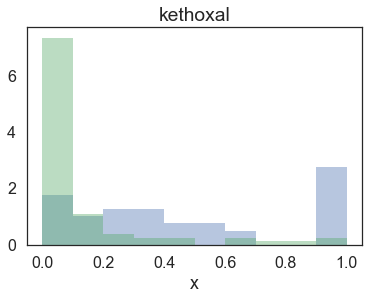

               x   y          a
count  40.000000  40  40.000000
mean    0.164325   1  31.959725
std     0.289394   0  24.291061
min     0.000000   1   3.014000
25%     0.000000   1  10.007750
50%     0.000000   1  30.094500
75%     0.171250   1  51.237750
max     1.000000   1  87.697000
               x   y          a
count  83.000000  83  83.000000
mean    0.052108   0  33.157771
std     0.149194   0  20.284443
min     0.000000   0   3.122000
25%     0.000000   0  16.378000
50%     0.000000   0  32.180000
75%     0.004000   0  47.608000
max     1.000000   0  86.462000


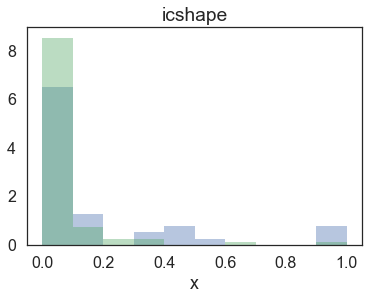

In [29]:
filelist = ['kethoxal', 'icshape']

X_test = [kethoxal_df, icshape_df]

fpr_list = []
tpr_list = []
roc_auc_list = []

for i in range(len(X_test)):
    X_test[i]['y'] = mouse_ct_new
    X_test[i]['a'] = pd.Series(mouse_acces_ls)
    X_test[i]['base'] = list(fa_dict['18S'])
    X_clean = X_test[i].dropna()
    X_select = X_clean[X_clean.a>=3]
    X_select = X_select[X_select['x']>=0]
    X_select = X_select[X_select['base']=='G']
    fpr,tpr,_ = roc_curve(X_select['y'],X_select['x'])
    ml_125_ss = X_select[X_select.y==1]
    ml_125_ds = X_select[X_select.y==0]
    print(ml_125_ss.describe())
    print(ml_125_ds.describe())
    sns.distplot(ml_125_ss.dropna()['x'],norm_hist=True,kde=False, bins=10)
    sns.distplot(ml_125_ds.dropna()['x'],norm_hist=True,kde=False, bins=10)
    plt.title(filelist[i])
    plt.show()
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(auc(fpr_list[i],tpr_list[i]))

0
1


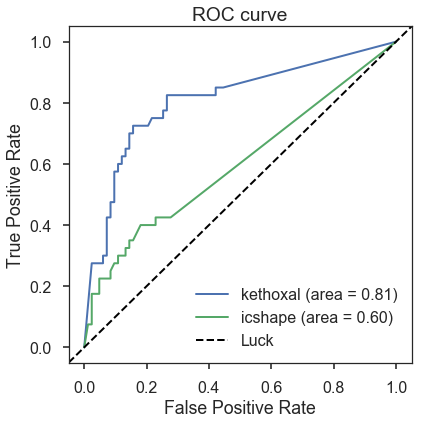

In [30]:
plt.figure()
lw = 2

filelist = ['kethoxal', 'icshape']
with sns.axes_style("ticks"):
    fig,ax=plt.subplots(figsize=(6,6))
for i in range(len(X_test)):
    print (i)
    plt.plot(fpr_list[i],tpr_list[i],lw = lw,label = '%s (area = %0.2f)' %(filelist[i],roc_auc_list[i]))
plt.plot([-0.05, 1.05], [-0.05, 1.05], color='black', lw=lw, linestyle='--',label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
# plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.legend(loc='best')
# plt.show()
plt.tight_layout()
plt.savefig('18s_AUC.pdf')